<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe8-OptimalBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del árbol de búsqueda óptimo

**Entrada**:

**Salida**:



# 2. Optimal BST

## 2.1 Código 

### Funciones auxiliares

In [ ]:
class Node:
  right = None
  left = None
  key = None
  
  def __init__(self, key):
    self.key = key 

class Tree:
  root = None

  def insert(self, key):
    if self.root == None:
      self.root = Node(key)
      return None, 0

    parent = self.root

    while True:
      if key <= parent.key:
        if parent.left == None:
          parent.left = Node(key)
          return parent, 1
        else:
          parent = parent.left
      
      else:
        if parent.right == None:
          parent.right = Node(key)
          return parent, 2
        else:
          parent = parent.right

In [ ]:
import networkx as nx

# Obtenido de https://stackoverflow.com/questions/33439810/

def binary_tree_layout(G, root, width=1., vert_gap = 0.2, vert_loc = 0, 
                       xcenter = 0.5, pos = None, parent = None):
  if pos == None:
    pos = {root:(xcenter,vert_loc)}
  else:
    pos[root] = (xcenter, vert_loc)

  neighbors = list(G.neighbors(root))

  if len(neighbors) != 0:

    dx = width/2.
    leftx = xcenter - dx/2
    rightx = xcenter + dx/2

    for neighbor in neighbors:
      if G.nodes[neighbor]['child_status'] == 'left':
        pos = binary_tree_layout(G, neighbor, width = dx, vert_gap = vert_gap, 
                                 vert_loc = vert_loc-vert_gap, xcenter=leftx, 
                                 pos=pos, parent = root)
        
      elif G.nodes[neighbor]['child_status'] == 'right':
        pos = binary_tree_layout(G, neighbor, width = dx, vert_gap = vert_gap,
                                 vert_loc = vert_loc-vert_gap, xcenter=rightx,
                                 pos=pos, parent = root)
        
  return pos

In [ ]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

def visualize_tree(n):
  T = nx.DiGraph()

  tree = Tree()
  for i in range(len(n)):
    parent, pos = tree.insert(n[i])

    if pos == 0 or pos == 1:
      T.add_node(n[i], child_status='left')
    else:
      T.add_node(n[i], child_status='right')

    if parent:
      T.add_edge(parent.key, n[i])

  tree_pos = binary_tree_layout(T, n[0])
  nx.draw(T, tree_pos, with_labels=True, font_size=12, node_size=1000, node_color='white', edgecolors='black')

In [ ]:
from termcolor import colored

def print_matrix(A, m, n, k, color):
  print("%2s " % '', end='')
  for i in range(1,m):
    print("%-5d " % (i-1), end='')
  print()
  for i in range(1,m):
    print("%-2d " % i, end='')
    for j in range(n):
      if j-i+1 == k:
        print(colored("%.3f " % A[i][j], color), end='')
      else:
        print("%.3f " % A[i][j], end='')
    print()
  print()

### Optimal BST (recursivo)

Costo esperado mínimo: 3.12
Llamadas recursivas: 2187


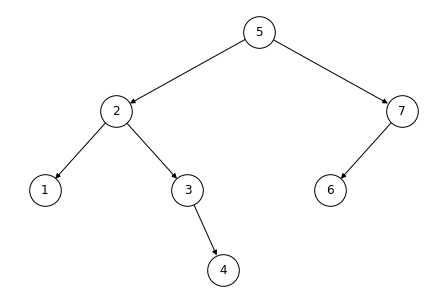

In [ ]:
from math import inf
from termcolor import colored

def recursive_optimal_bst(k,p,q,i,j,visualize=False,verbose=False,first_call=True):
  # Contador de llamadas recursivas
  global c
  c = c+1

  if verbose and first_call:
    print(f"Entrada:")
    print(f"Claves del árbol: {k}")
    print(f"Probabilidades de las claves reales: {np.around(p,3)}")
    print(f"Probabilidades de las claves ficticias: {np.around(q,3)}\n")

  # Caso base
  if j < i: return q[i-1], []

  # Suma de probabilidades de los nodos del árbol
  w = sum(p[i-1:j]) + sum(q[i-1:j+1])

  if verbose:
    print(f"Calculando suma de probabilidades para los nodos {i}..{j}: ", end='')
    print(f"({colored(round(w,3), 'blue')})\n")

  # Nos aseguramos de que e se actualice en la primera iteración
  e = inf

  for r in range(i, j+1):
    # Costo óptimo del subárbol izquierdo
    e_left, t_left = recursive_optimal_bst(k, p, q, i, r-1, visualize=False,
                                           verbose=False, first_call=False)

    # Costo óptimo del subárbol derecho
    e_right, t_right = recursive_optimal_bst(k, p, q, r+1, j, visualize=False,
                                             verbose=False, first_call=False)

    # Costo óptimo del árbol con raíz r
    x = e_left + e_right + w

    # Nos quedamos con el costo mínimo
    if x < e:
      e = x

      # Se reconstruye el árbol
      tree = t_right + t_left
      tree.insert(0,k[r-1])

    if verbose:
      print(f"Calculando costo esperado para árbol con raíz {r}")
      print(f"Calculando recursivamente costo para subárbol {i}..{r-1}: ", end='')
      print(f"({colored(round(e_right,3), 'green')})")
      print(f"Calculando recursivamente costo para subárbol {r+1}..{j}: ", end='')
      print(f"({colored(round(e_left,3), 'magenta')})")
      print(f"Costo esperado: {round(e_left,3)} + {round(e_right,3)} + {round(w,3)} = {round(x,3)}")
      print(f"Costo esperado mínimo: {round(e,3)}\n")

  if verbose:
    print(f"Costo mínimo del árbol: {round(e,3)}")

  # Se dibuja el árbol 
  if visualize:
    visualize_tree(tree)

  return e, tree

c = 0
k = [1, 2, 3, 4, 5, 6, 7]
p = [0.04, 0.06, 0.08, 0.02, 0.10, 0.12, 0.14]
q = [0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05]

e, tree = recursive_optimal_bst(k,p,q,1,len(p),visualize=True)

print(f"Costo esperado mínimo: {e}")
print(f"Llamadas recursivas: {c}")

### Optimal BST (bottom-up)

Costo esperado mínimo: 2.75
Subproblemas resueltos: 15


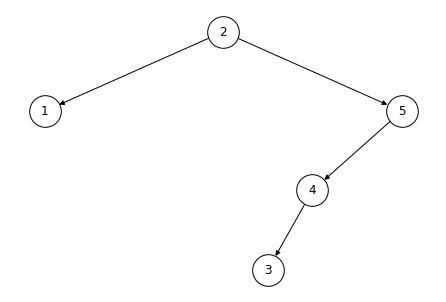

In [ ]:
import numpy as np
from math import inf

def optimal_bst(k,p,q,n,visualize=False,verbose=False):
  # Contador de subproblemas
  global s

  # Matriz que almacena el costo mínimo de cada subárbol
  e = np.zeros(shape=(n+2,n+1))

  # Matriz que almacena la suma de probabilidades de cada subárbol
  w = np.zeros(shape=(n+2,n+1))

  # Matriz que almacena la raíz óptima de cada subárbol
  root = np.zeros(shape=(n+2,n+2), dtype=int)

  if verbose:
    print(f"Entrada:")
    print(f"Claves del árbol: {k}")
    print(f"Probabilidades de las claves reales: {np.around(p,3)}")
    print(f"Probabilidades de las claves ficticias: {np.around(q,3)}\n")

  # Valores para búsquedas fallidas
  for i in range(1,n+2):
    e[i][i-1] = q[i-1]
    w[i][i-1] = q[i-1]

  if verbose:
    print("Inicializando matriz de probabilidades:")
    print_matrix(w,n+2,n+1,0,'blue')
    print("Inicializando matriz de costos:")
    print_matrix(e,n+2,n+1,0,'green')

  for k in range(1,n+1):
    for i in range(1,n-k+2):
      j = i+k-1
      s = s+1

      # Se calcula la suma de probabilidades para el subárbol i..j
      w[i][j] = w[i][j-1] + p[j-1] + q[j]

      if verbose:
        print(f"Calculando suma de probabilidades para los nodos {i}..{j}: ", end='')
        print(f"({colored(round(w[i][j],3), 'blue')})")

      # Nos aseguramos de que e[i][j] se actualice en la primera iteración
      e[i][j] = inf

      for r in range(i,j+1):
        # Costo óptimo del árbol con raíz r
        x = e[i][r-1] + e[r+1][j] + w[i][j]

        # Nos quedamos con el costo mínimo
        if x < e[i][j]:

          # Guardamos el costo en la matriz e y la raíz en la matriz root
          e[i][j] = x
          root[i][j] = r

      if verbose:
        print(f"Calculando costo esperado para subárbol {i}..{j}: ", end='')
        print(f"({colored(round(e[i][j],3), 'green')})\n")

    if verbose:
      print("Matriz de probabilidades:")
      print_matrix(w,n+2,n+1,k,'blue')
      print("Matriz de costos:")
      print_matrix(e,n+2,n+1,k,'green')

  if verbose:
    print(f"Costo mínimo del árbol: {round(e[1][n],3)}")

  # Se reconstruye y se dibuja el árbol
  if visualize:
    tree = construct_optimal_bst(root, k, 1, n)
    visualize_tree(tree)

  return e[1][n], root

def construct_optimal_bst(root, k, i, j):
  # Caso base
  if i > j:
    return []

  # Raíz del árbol i..j
  r = root[i][j]

  # Obtenemos los nodos de cada subárbol desde la raíz hacia abajo
  t_right = construct_optimal_bst(root, k, i, r-1)
  t_left = construct_optimal_bst(root, k, r+1, j)

  # Juntamos los nodos de cada subárbol e insertamos la raíz de ambos
  tree = t_left + t_right
  tree.insert(0, r)

  return tree
  
s = 0
k = [1, 2, 3, 4, 5]
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]

e, root = optimal_bst(k,p,q,5,visualize=True)

print(f"Costo esperado mínimo: {e}")
print(f"Subproblemas resueltos: {s}")

## 2.2 Descripción del algoritmo

### Subestructura óptima y solución recursiva

### Descripción de la solución (algoritmo recursivo)

### Descripción de la solución (programación dinámica)





## 2.3 Ejemplo


## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada paso de ambos algoritmos.



### Optimal BST (recursivo)

In [ ]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q

Entrada:
Claves del árbol: [1, 6, 15, 27, 29]
Probabilidades de las claves reales: [0.111 0.071 0.079 0.118 0.116]
Probabilidades de las claves ficticias: [0.115 0.111 0.102 0.064 0.083 0.031]

Calculando suma de probabilidades para los nodos 1..5: (1.0)

Calculando costo esperado para árbol con raíz 1
Calculando recursivamente costo para subárbol 1..0: (2.065)
Calculando recursivamente costo para subárbol 2..5: (0.115)
Costo esperado: 0.115 + 2.065 + 1.0 = 3.18
Costo esperado mínimo: 3.18

Calculando costo esperado para árbol con raíz 2
Calculando recursivamente costo para subárbol 1..1: (1.346)
Calculando recursivamente costo para subárbol 3..5: (0.561)
Costo esperado: 0.561 + 1.346 + 1.0 = 2.908
Costo esperado mínimo: 2.908

Calculando costo esperado para árbol con raíz 3
Calculando recursivamente costo para subárbol 1..2: (0.82)
Calculando recursivamente costo para subárbol 4..5: (1.119)
Costo esperado: 1.119 + 0.82 + 1.0 = 2.938
Costo esperado mínimo: 2.908

Calculando costo esper

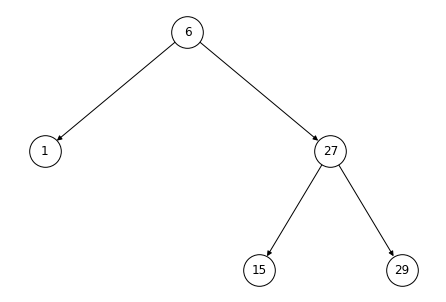

In [ ]:
k, p, q = optimal_bst_instance_generator(5)
e, tree = recursive_optimal_bst(k,p,q,1,len(p),visualize=True,verbose=True)

### Optimal BST (bottom-up)

Entrada:
Claves del árbol: [18, 43, 75, 84, 95]
Probabilidades de las claves reales: [0.121 0.129 0.109 0.019 0.033]
Probabilidades de las claves ficticias: [0.01  0.126 0.114 0.135 0.145 0.059]

Inicializando matriz de probabilidades:
   0     1     2     3     4     5     
1  0.010 0.000 0.000 0.000 0.000 0.000 
2  0.000 0.126 0.000 0.000 0.000 0.000 
3  0.000 0.000 0.114 0.000 0.000 0.000 
4  0.000 0.000 0.000 0.135 0.000 0.000 
5  0.000 0.000 0.000 0.000 0.145 0.000 
6  0.000 0.000 0.000 0.000 0.000 0.059 

Inicializando matriz de costos:
   0     1     2     3     4     5     
1  0.010 0.000 0.000 0.000 0.000 0.000 
2  0.000 0.126 0.000 0.000 0.000 0.000 
3  0.000 0.000 0.114 0.000 0.000 0.000 
4  0.000 0.000 0.000 0.135 0.000 0.000 
5  0.000 0.000 0.000 0.000 0.145 0.000 
6  0.000 0.000 0.000 0.000 0.000 0.059 

Calculando suma de probabilidades para los nodos 1..1: (0.257)
Calculando costo esperado para subárbol 1..1: (0.394)

Calculando suma de probabilidades para los nodos 2..

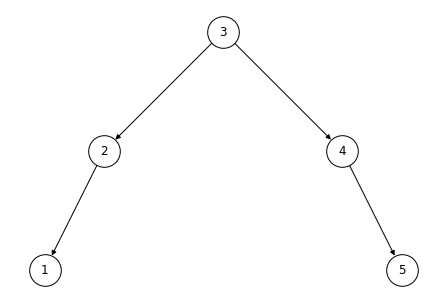

In [ ]:
k, p, q = optimal_bst_instance_generator(5)
e, tree = optimal_bst(k,p,q,5,visualize=True,verbose=True)

# 3. Correctitud

### **Teorema 1: Correctitud de Optimal BST (bottom-up)**

**

## Prueba del Teorema

Para demostrar la correctitud del algoritmo, demostraremos el teorema anterior $P(n)$ utilizando inducción.

**Caso base**

**Paso inductivo**




# 4. Tiempo de ejecución y complejidad espacial

### **Teorema 2: Tiempo de ejecución del algoritmo Optimal BST (recursivo)**

*El algoritmo **Optimal BST** recursivo tiene un tiempo de ejecución $O(3^n)$.*

## Prueba del teorema


### **Teorema 3: Tiempo de ejecución del algoritmo Optimal BST (bottom-up)**

*El algoritmo **Optimal BST** implementado con programación dinámica tiene un tiempo de ejecución $O(n^3)$.*

## Prueba del teorema

Para demostrar el teorema, calcularemos matemáticamente la cantidad de subproblemas que debe resolver este algoritmo. Observemos que la cantidad de subproblemas corresponde al número de subárboles a los cuales se calcula el costo esperado mínimo. Estos valores son almacenados en una matriz triangular superior, en las casillas que se muestran en la figura ($n = 5$).

![picture](https://drive.google.com/uc?export=view&id=11dEi4btP5Y6Vcw8FGj41ccUOeoZ-5xpM)

Generalizando, para un problema de tamaño $n$ se ocupará la mitad de casillas de una matriz $n \times n$, es decir, se resolverán $\frac{n^2}{2}$ subproblemas.

Luego, cada subproblema es resuelto con la fórmula recursiva:

$  
e[i,j] = 
     \begin{cases}
       q_{i-1} &\quad\text{si } j = i - 1\\
       \min\limits_{i \leq r \leq j} e[i,r-1] + e[r+1,j] + w[i,j] &\quad\text{si } i \leq j\\
     \end{cases}
$

Como se puede ver, encontrar la solución de manera recursiva requiere iterar por todas las raíces posibles que puede tener el subárbol $i \ldots j$. Por lo tanto, encontrar la solución a cada subproblema tiene un tiempo de $O(n)$.

Por último, reconstruir el árbol con la función `construct_optimal_bst` tiene un tiempo de ejecución $O(\log{n})$.

Considerando esto, podemos calcular el tiempo total del algoritmo con la función $T(n) = f(n) \cdot g(n) + h(n)$, donde $f(n)$ corresponde a la cantidad de subproblemas, $g(n)$ corresponde al tiempo necesario para resolver cada subproblema, y $h(n)$ es el tiempo empleado en reconstruir la solución final. Reemplazando, obtenemos:

$T(n) = O(n^2) \cdot O(n) + O(\log{n})$

$T(n) = O(n^3)$

Finalmente, notemos que no existe un peor ni un mejor caso para este algoritmo. Puesto que se trata de un algoritmo de **optimización**, se considerarán todos los casos posibles para encontrar la solución final. Debido a esto, podemos decir que el tiempo ocupado por el algoritmo solo depende del tamaño del problema, y por lo tanto, podemos expresar su complejidad con la notación $\Theta(n^3)$. $\Box$





# 5. Experimentos

## 5.1. Comparación entre implementación recursiva y bottom-up


### Tiempo experimental de Optimal BST (recursivo)

Los valores de entrada para este gráfico serán generados de forma aleatoria con $n \in [5,15]$

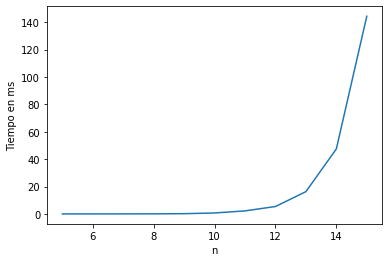

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat

x=[]; y=[];

for n in range(5,16):
  k, p, q = optimal_bst_instance_generator(n)
  t = repeat(setup="from __main__ import recursive_optimal_bst", stmt=f"recursive_optimal_bst({k},{p},{q.tolist()},{1},{n})", repeat=1, number=10)

  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Tiempo experimental de Optimal BST (bottom-up)

Los valores de entrada para este gráfico serán generados de forma aleatoria con $n \in [5,50]$

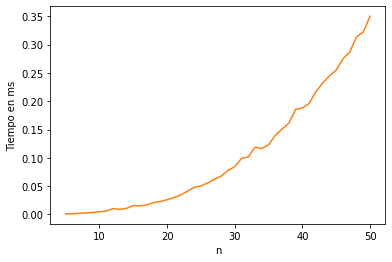

In [ ]:
x=[]; y=[];

for n in range(5,51):
  k, p, q = optimal_bst_instance_generator(n)
  t = repeat(setup="from __main__ import optimal_bst", stmt=f"optimal_bst({k},{p},{q.tolist()},{n})", repeat=1, number=10)

  x.append(n)
  y.append(t)

plt.plot(x,y, color='tab:orange')
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Tiempo experimental para ambos algoritmos

Los valores de entrada para este gráfico serán generados de forma aleatoria con $n \in [5,15]$

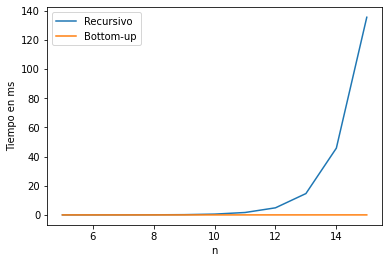

In [ ]:
x=[]; y1=[]; y2=[];

for n in range(5,16):
  k, p, q = optimal_bst_instance_generator(n)
  t1 = repeat(setup="from __main__ import recursive_optimal_bst", stmt=f"recursive_optimal_bst({k},{p},{q.tolist()},{1},{n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import optimal_bst", stmt=f"optimal_bst({k},{p},{q.tolist()},{n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Recursivo", "Bottom-up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Como era de esperar, el tiempo de ejecución del algoritmo recursivo crece a un nivel exponencial, a diferencia de la implementación con programación dinámica, cuya curva tiene un crecimiento polinómico.

A la hora de comparar ambos algoritmos, podemos notar que el tiempo del algoritmo recursivo predomina totalmente en el gráfico. Esto se debe a la complejidad $O(3^n)$ del algoritmo recursivo, cuya tasa de crecimiento es significativamente mayor que la complejidad $O(n^3)$ del algoritmo bottom-up.


## 5.2. Optimal BST con raíz fija

### Análisis de resultados

